In [ ]:
# 2020A 2）结果

In [28]:
import numpy as np

In [29]:
# Celsius
T15 = 182
T6 = 203
T7 = 237
T89 = 254
T1011 = 25
T_env = 25

In [30]:
# centimeter
stove_env = 25
small_room = 30.5
room_interval = 5

In [31]:
T_stove_bs_dif = [
    stove_env,
    small_room * 5 + room_interval * 4, # 1-5 without the last interval
    room_interval, # 5 interval
    small_room, # 6 room
    room_interval, # 6 interval
    small_room, # 7 room
    room_interval, # 7 interval
    small_room * 2 + room_interval, # 8-9 without the last interval
    room_interval, # 9 interval
    small_room * 2 + room_interval, # 10-11 without the last interval
    room_interval + stove_env # 11 interval and the stove-env area
]

In [32]:
T_stove_bs = [0]
for each in T_stove_bs_dif:
    T_stove_bs.append(T_stove_bs[-1] + each)
T_stove_bs

[0, 25, 197.5, 202.5, 233.0, 238.0, 268.5, 273.5, 339.5, 344.5, 410.5, 440.5]

In [33]:
len(T_stove_bs)

12

In [34]:
def T_air(x):
    if T_stove_bs[0] <= x <= T_stove_bs[1]:
        slope = (T15 - T_env) / (T_stove_bs[1] - T_stove_bs[0])
        return slope * (x - T_stove_bs[0]) + T_env
    elif T_stove_bs[1] < x <= T_stove_bs[2]:
        return T15
    elif T_stove_bs[2] < x <= T_stove_bs[3]:
        slope = (T6 - T15) / (T_stove_bs[3] - T_stove_bs[2])
        return slope * (x - T_stove_bs[2]) + T15
    elif T_stove_bs[3] < x <= T_stove_bs[4]:
        return T6
    elif T_stove_bs[4] < x <= T_stove_bs[5]:
        slope = (T7 - T6) / (T_stove_bs[5] - T_stove_bs[4])
        return slope * (x - T_stove_bs[4]) + T6
    elif T_stove_bs[5] < x <= T_stove_bs[6]:
        return T7
    elif T_stove_bs[6] < x <= T_stove_bs[7]:
        slope = (T89 - T7) / (T_stove_bs[7] - T_stove_bs[6])
        return slope * (x - T_stove_bs[6]) + T7
    elif T_stove_bs[7] < x <= T_stove_bs[8]:
        return T89
    elif T_stove_bs[8] < x <= T_stove_bs[9]:
        slope = (T1011 - T89) / (T_stove_bs[9] - T_stove_bs[8])
        return slope * (x - T_stove_bs[8]) + T89
    elif T_stove_bs[9] < x <= T_stove_bs[10]:
        return T1011
    elif T_stove_bs[10] < x <= T_stove_bs[11]:
        slope = (T1011 - T_env) / (T_stove_bs[11] - T_stove_bs[10])
        return slope * (x - T_stove_bs[10]) + T1011

<Axes: >

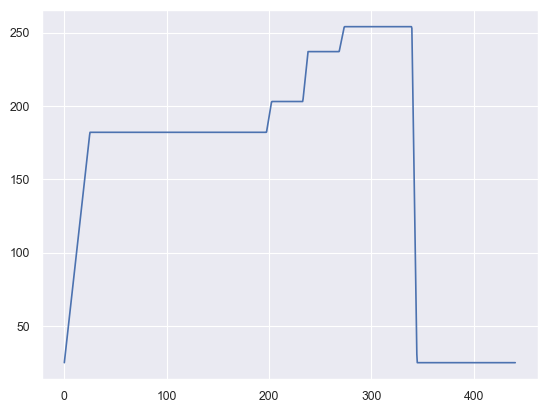

In [35]:
# Plot T for x
import seaborn as sns
sns.set_theme("paper")
x = np.linspace(0, 440.5, 1000)
y = np.vectorize(T_air)(x)
sns.lineplot(x=x, y=y)

In [36]:
def get_seg(pos):
    for i in range(1, len(T_stove_bs)):
        if pos < T_stove_bs[i]:
            return int(i - 1)
    return int(len(T_stove_bs) - 1)

In [37]:
dt = 0.1

In [38]:
def cal(speed):
    speed /= 60
    # cm / min -> cm / s
    theta = np.array([532.23876665,  54.55804656,  51.51008425,  60.64395191,
        73.58904021,  48.13889706, 306.98201478,  36.52734275,
        423.53293641, 168.02540902,  66.58185161,  47.14781481])
    time = T_stove_bs[-1] / speed
    n_ = int(time / dt)
    T = np.zeros(n_)
    T.fill(T_env)
    theta_over_dt = theta / dt
    for t_ in range(1, n_):
        pos = t_ * dt * speed
        T_a = T_air(pos)
        t = theta_over_dt[get_seg(pos)]
        T[t_] = (T_a + T[t_ - 1] * t) / (1 + t)
    return T

In [39]:
eps = 1e-4
left = 65
right = 100
while right - left > eps:
    mid = (left + right) / 2
    prediction = cal(mid)
    """
    界限名称	最低值	最高值	单位
    温度上升斜率	0	3	ºC/s
    温度下降斜率	-3	0	ºC/s
    温度上升过程中在150ºC~190ºC的时间	60	120	s
    温度大于217ºC的时间	40	90	s
    峰值温度	240	250	ºC
    """
    slope_max = np.diff(prediction).max() / dt
    slope_min = np.diff(prediction).min() / dt
    time_within_150_190 = np.sum((prediction > 150) & (prediction < 190)) * dt
    time_above_217 = np.sum(prediction > 217) * dt
    peak = prediction.max()
    if slope_max <= 3 and slope_min >= -3 and time_within_150_190 >= 60 and time_within_150_190 <= 120 and time_above_217 >= 40 and time_above_217 <= 90 and peak >= 240 and peak <= 250:
        print(f"Valid: {mid}")
        left = mid
    else:
        print(f"Invalid: {mid}")
        right = mid

Valid: 82.5
Invalid: 91.25
Invalid: 86.875
Invalid: 84.6875
Invalid: 83.59375
Invalid: 83.046875
Invalid: 82.7734375
Valid: 82.63671875
Invalid: 82.705078125
Invalid: 82.6708984375
Invalid: 82.65380859375
Invalid: 82.645263671875
Invalid: 82.6409912109375
Invalid: 82.63885498046875
Invalid: 82.63778686523438
Invalid: 82.63725280761719
Invalid: 82.6369857788086
Valid: 82.6368522644043
Invalid: 82.63691902160645


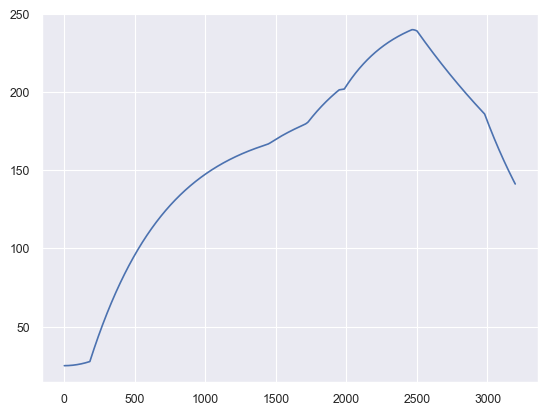

In [40]:
import matplotlib.pyplot as plt

plt.plot(cal(82.6368522644043))

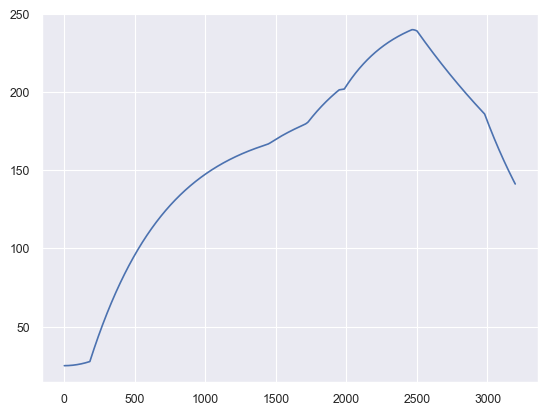

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cal(82.6368522644043))